In [1]:
from helper import *

In [2]:
sequences = torch.from_numpy(getData("Data/rbcL_ordinal_encoding.txt", 50000)).float()

In [3]:
architecture_name = "Kmeans"

In [4]:
len(sequences)

50000

In [5]:
def KMeansOnEmbeddings(sequences_list, n_clusters, seed=42, normalize=True):
    # define Kmeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1500)
    
    # run Kmeans
    cluster_labels = kmeans.fit_predict(sequences_list)

    # count labels to see if the clusters look okay ish
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

    for label, count in zip(unique_labels, label_counts):
        print(f"Label {label}: Count {count}")

    return cluster_labels, unique_labels


In [6]:
def pairWiseCrossValidation(data, sequences):
    sum_means = []
    for k in range(3, 50):
        cluster_labels, unique_labels = KMeansOnEmbeddings(data, k)
        means = []
        for ind in unique_labels:
            cluster_sequences = [sequences[i] for i, label in enumerate(cluster_labels) if label == unique_labels[ind]]
            
            means.append(np.mean(pairwise_distances(cluster_sequences, metric="cosine")))
        sum_means.append(np.mean(np.array(means)))
    return np.argmin(sum_means) + 3

In [7]:
data = sequences.detach().numpy()

In [8]:
print(data.shape)

(50000, 300)


In [25]:
num_clusters = pairWiseCrossValidation(data, data)

Label 0: Count 1740
Label 1: Count 2747
Label 2: Count 45513
Label 0: Count 2747
Label 1: Count 1441
Label 2: Count 1740
Label 3: Count 44072
Label 0: Count 2410
Label 1: Count 1740
Label 2: Count 2747
Label 3: Count 1709
Label 4: Count 41394
Label 0: Count 1160
Label 1: Count 2410
Label 2: Count 1740
Label 3: Count 41557
Label 4: Count 2747
Label 5: Count 386
Label 0: Count 972
Label 1: Count 27476
Label 2: Count 1441
Label 3: Count 2747
Label 4: Count 2703
Label 5: Count 12921
Label 6: Count 1740
Label 0: Count 29252
Label 1: Count 1535
Label 2: Count 2747
Label 3: Count 799
Label 4: Count 1740
Label 5: Count 10583
Label 6: Count 1441
Label 7: Count 1903
Label 0: Count 743
Label 1: Count 1160
Label 2: Count 2747
Label 3: Count 1740
Label 4: Count 3829
Label 5: Count 1441
Label 6: Count 1771
Label 7: Count 3410
Label 8: Count 33159
Label 0: Count 38478
Label 1: Count 972
Label 2: Count 799
Label 3: Count 1441
Label 4: Count 2747
Label 5: Count 1570
Label 6: Count 1740
Label 7: Count 6

In [26]:
print(num_clusters)

15


In [6]:
num_clusters = 15

In [7]:
cluster_labels, unique_labels = KMeansOnEmbeddings(sequences, num_clusters)

Label 0: Count 152
Label 1: Count 981
Label 2: Count 434
Label 3: Count 1160
Label 4: Count 799
Label 5: Count 1740
Label 6: Count 420
Label 7: Count 1441
Label 8: Count 36991
Label 9: Count 552
Label 10: Count 492
Label 11: Count 2747
Label 12: Count 554
Label 13: Count 972
Label 14: Count 565


In [11]:
decodeSequencesRange(architecture_name, 0, num_clusters, sequences, ordinal_decoder, unique_labels, cluster_labels)

In [12]:
runClustalRange(architecture_name, 0, num_clusters, unique_labels, True)

Using 16 threads
Read 152 sequences (type: DNA) from clusters/Kmeans/cluster_0.fasta
Using 52 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 152 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 6578)
Ktuple-distance calculation progress: 13 % (904 out of 6578)
Ktuple-distance calculation progress: 22 % (1505 out of 6578)
Ktuple-distance calculation progress: 26 % (1762 out of 6578)
Ktuple-distance calculation progress: 27 % (1801 out of 6578)
Ktuple-distance calculation progress: 28 % (1851 out of 6578)
Ktuple-distance calculation progress: 29 % (1931 out of 6578)
Ktuple-distance calculation progress: 30 % (1975 out of 6578)
Ktuple-distance calculation progress: 33 % (2223 out of 6578)
Ktuple-distance calculation progress: 34 % (2239 out of 6578)
Ktuple-distance calculation progress: 39 % (2618 out of 6578)
Ktuple-distance calculation progress: 45 % (2986 out of 6578)
Ktuple-distance calculati

In [8]:
percentages = evaluateGapsInRange(architecture_name, 0, num_clusters, unique_labels)

clustal/Kmeans/cluster_0.clustal
Percentage of gaps in the alignment for cluster 0: 0.29%
clustal/Kmeans/cluster_1.clustal
Percentage of gaps in the alignment for cluster 1: 11.68%
clustal/Kmeans/cluster_2.clustal
Percentage of gaps in the alignment for cluster 2: 1.33%
clustal/Kmeans/cluster_3.clustal
Percentage of gaps in the alignment for cluster 3: 0.00%
clustal/Kmeans/cluster_4.clustal
Percentage of gaps in the alignment for cluster 4: 0.84%
clustal/Kmeans/cluster_5.clustal
Percentage of gaps in the alignment for cluster 5: 0.01%
clustal/Kmeans/cluster_6.clustal
Percentage of gaps in the alignment for cluster 6: 0.84%
clustal/Kmeans/cluster_7.clustal
Percentage of gaps in the alignment for cluster 7: 0.84%
clustal/Kmeans/cluster_8.clustal
Percentage of gaps in the alignment for cluster 8: 83.93%
clustal/Kmeans/cluster_9.clustal
Percentage of gaps in the alignment for cluster 9: 1.95%
clustal/Kmeans/cluster_10.clustal
Percentage of gaps in the alignment for cluster 10: 0.02%
clusta

In [18]:
countPercentageLowerThan(percentages, 10)

13

Plot for cluster 0


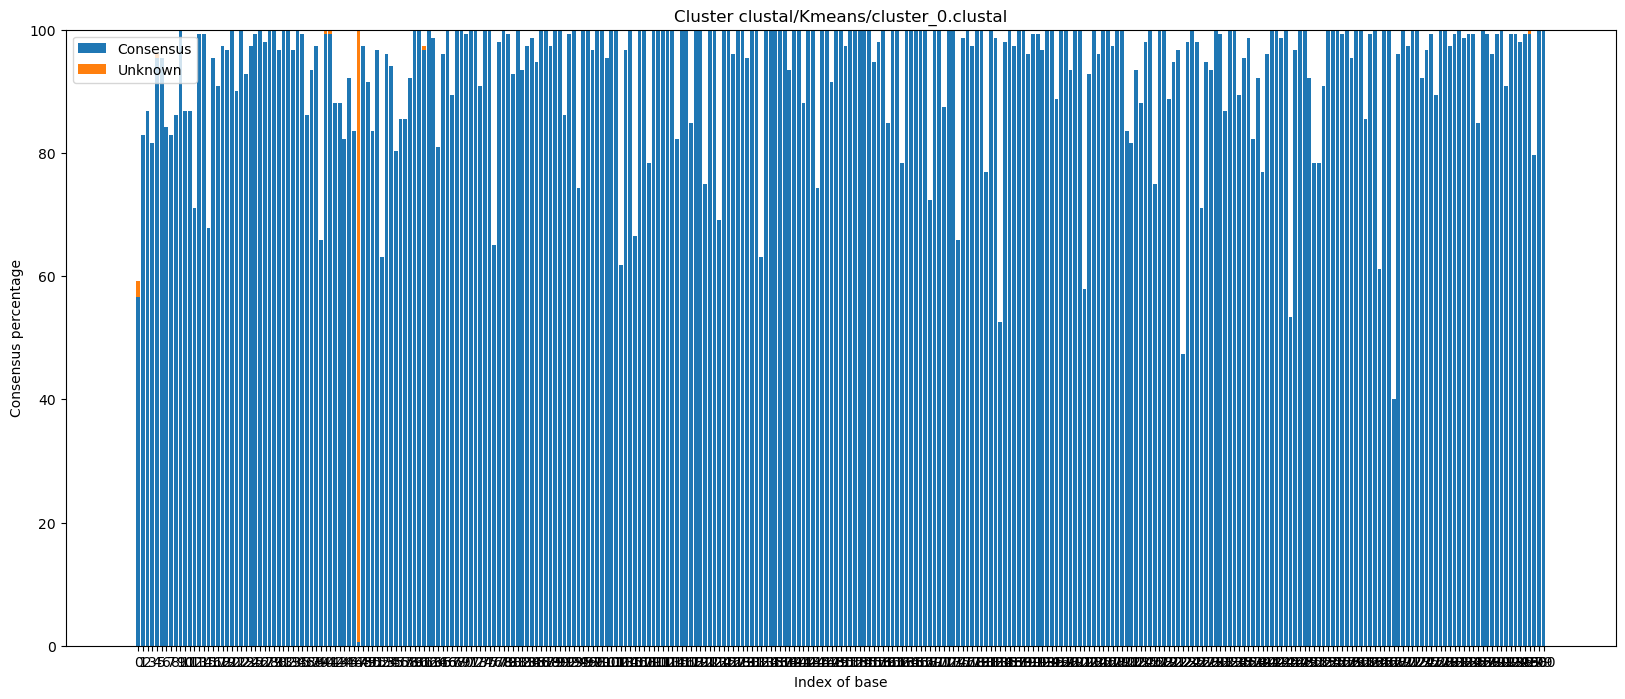

Plot for cluster 1


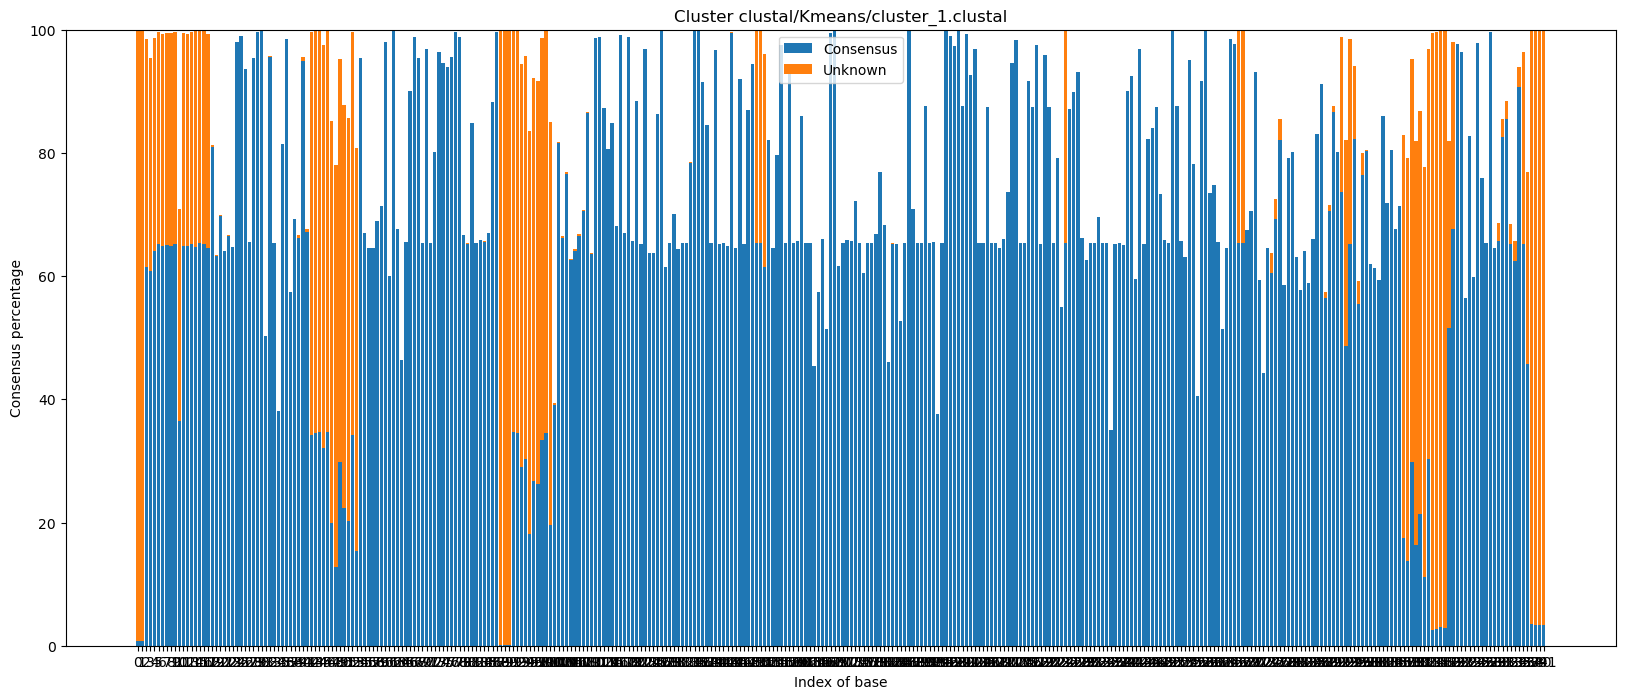

Plot for cluster 2


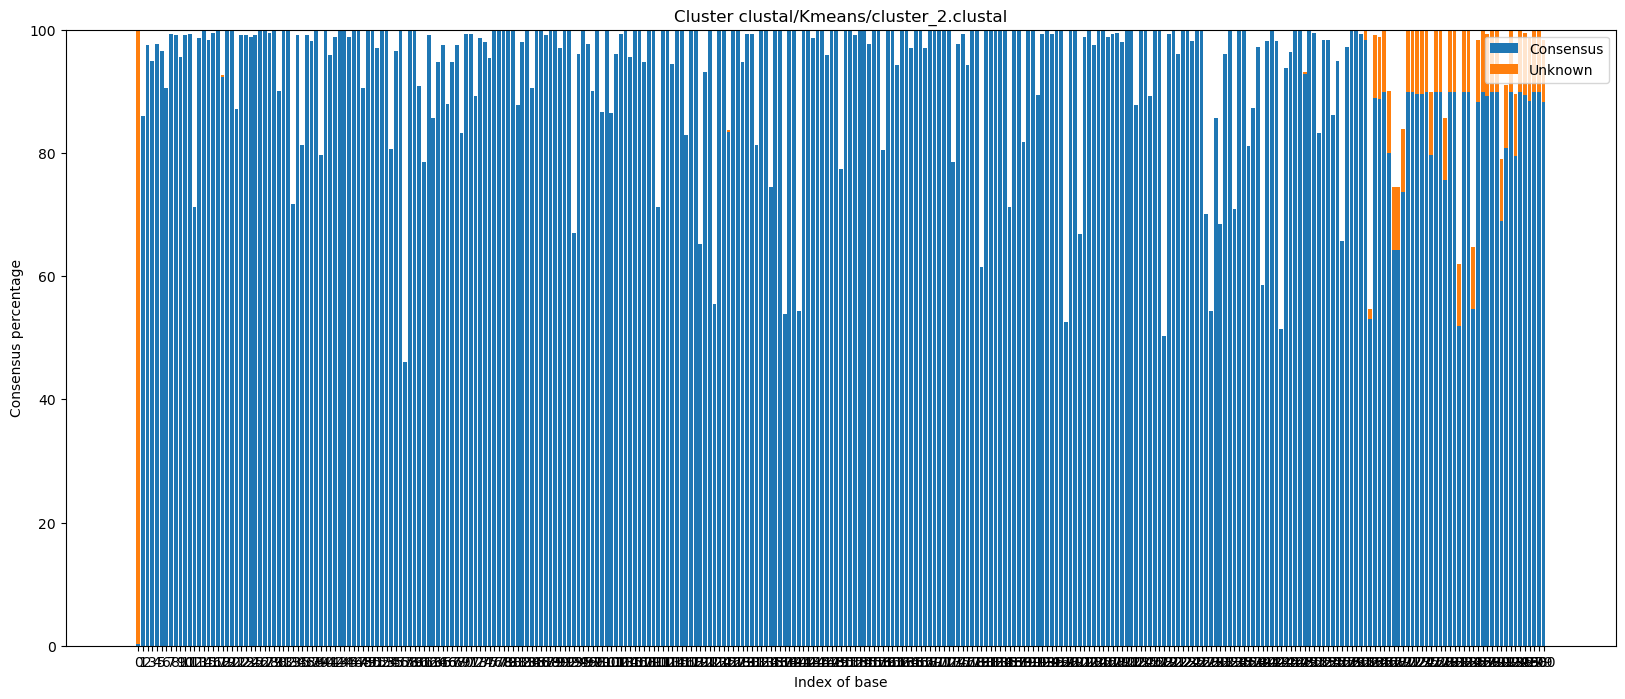

Plot for cluster 3


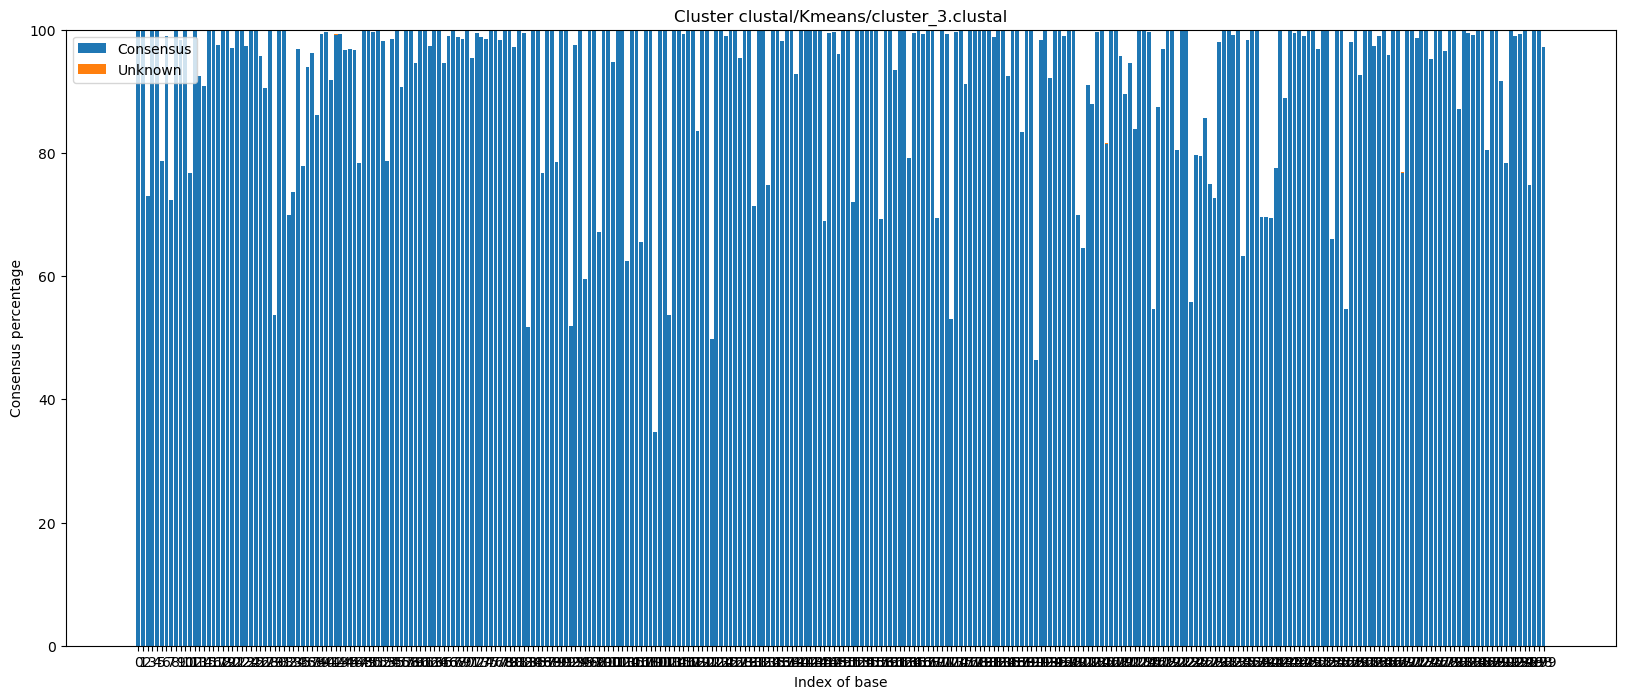

Plot for cluster 4


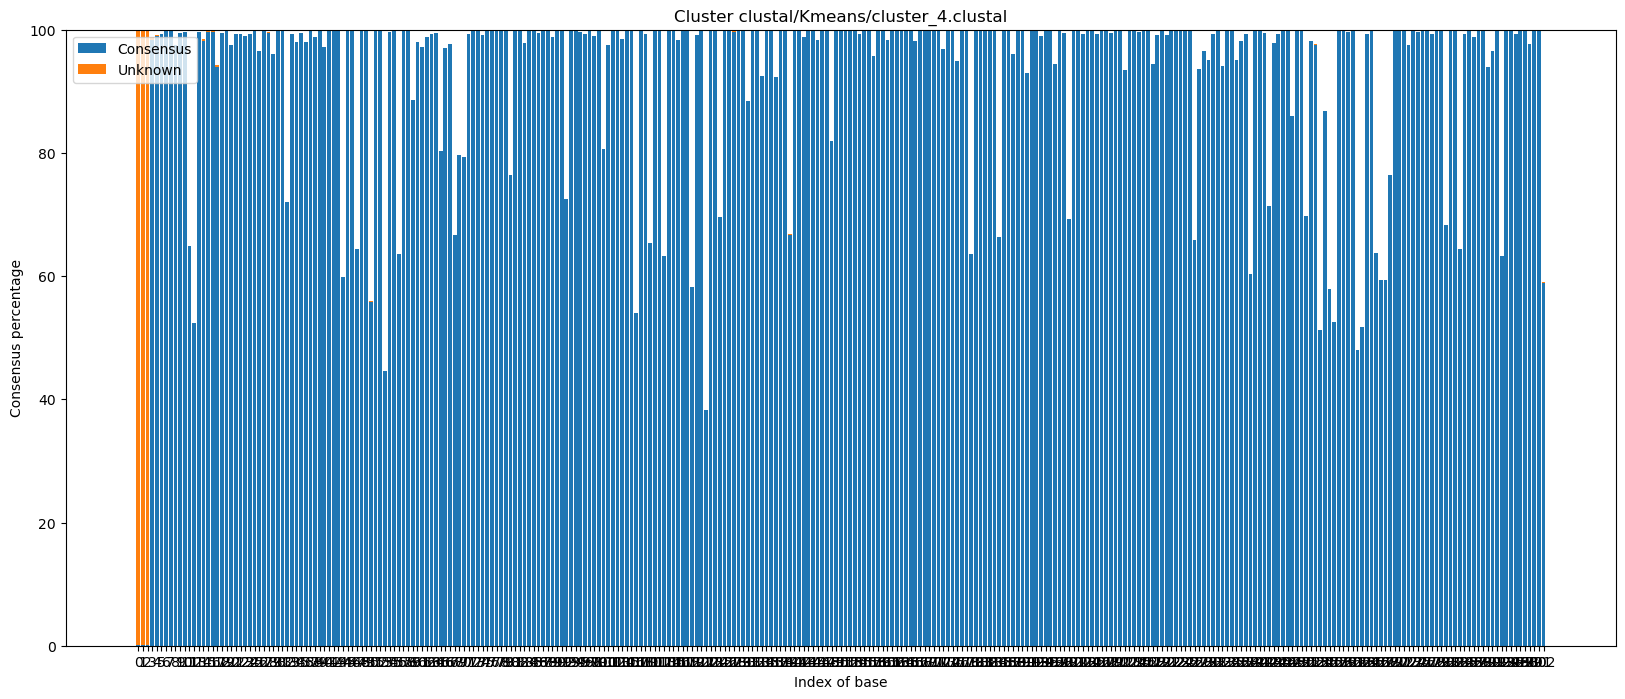

Plot for cluster 5


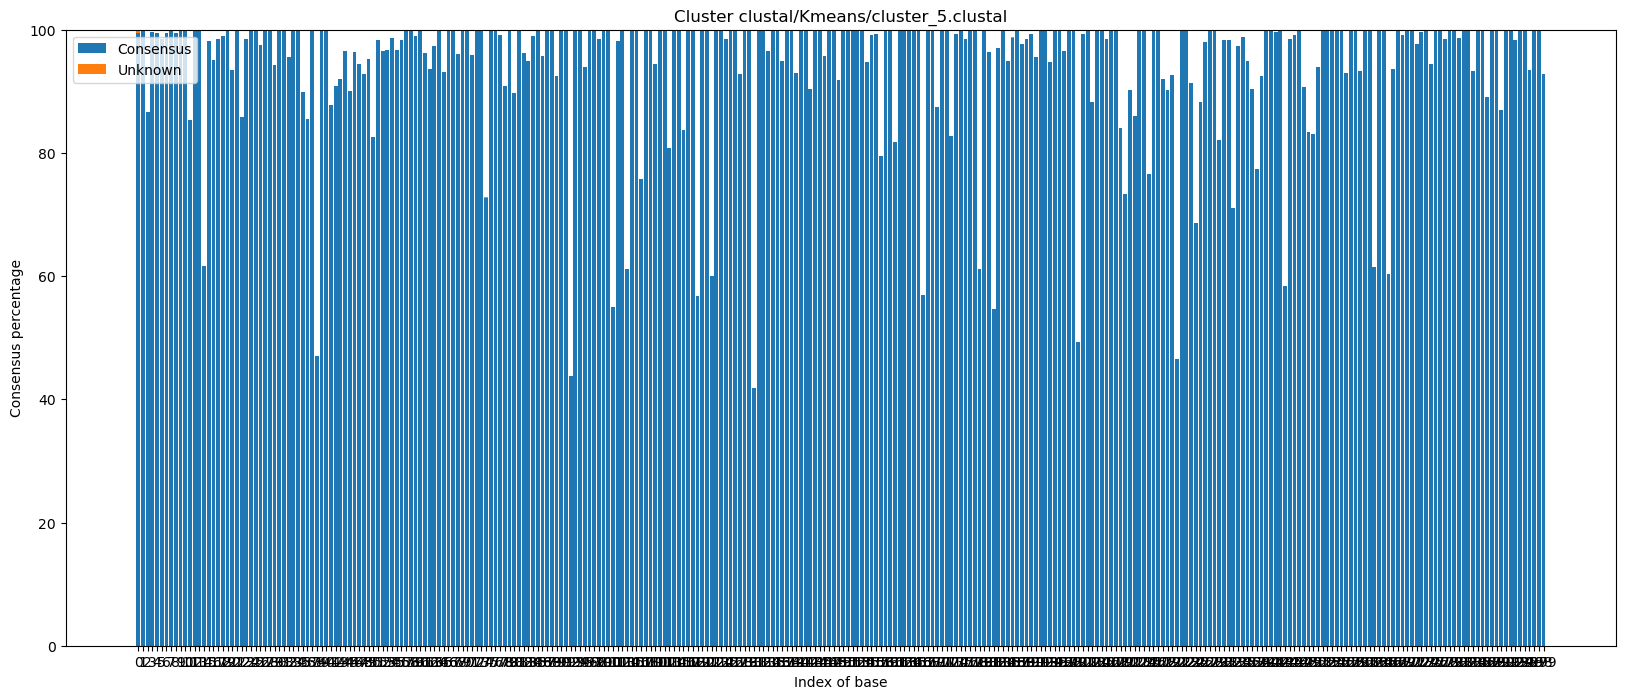

Plot for cluster 6


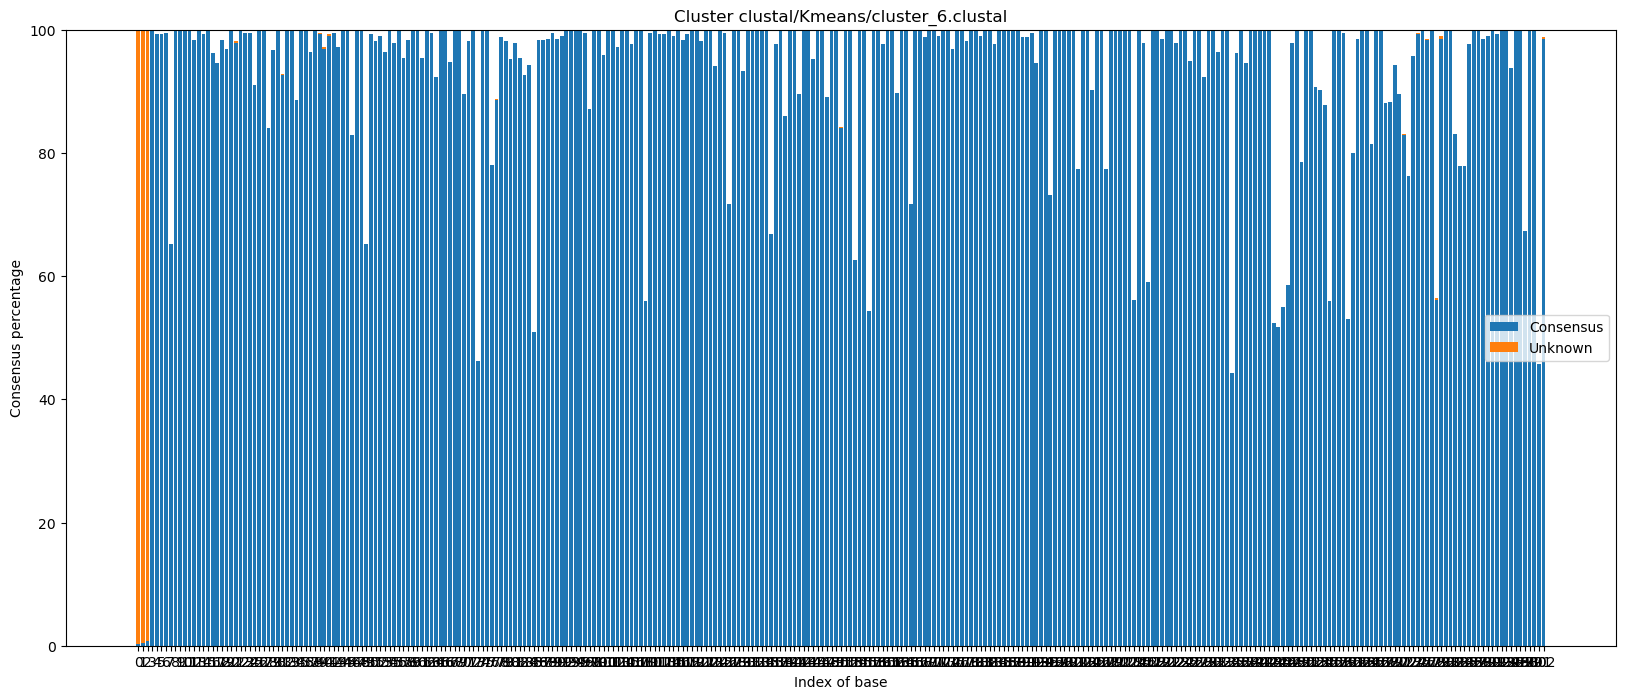

Plot for cluster 7


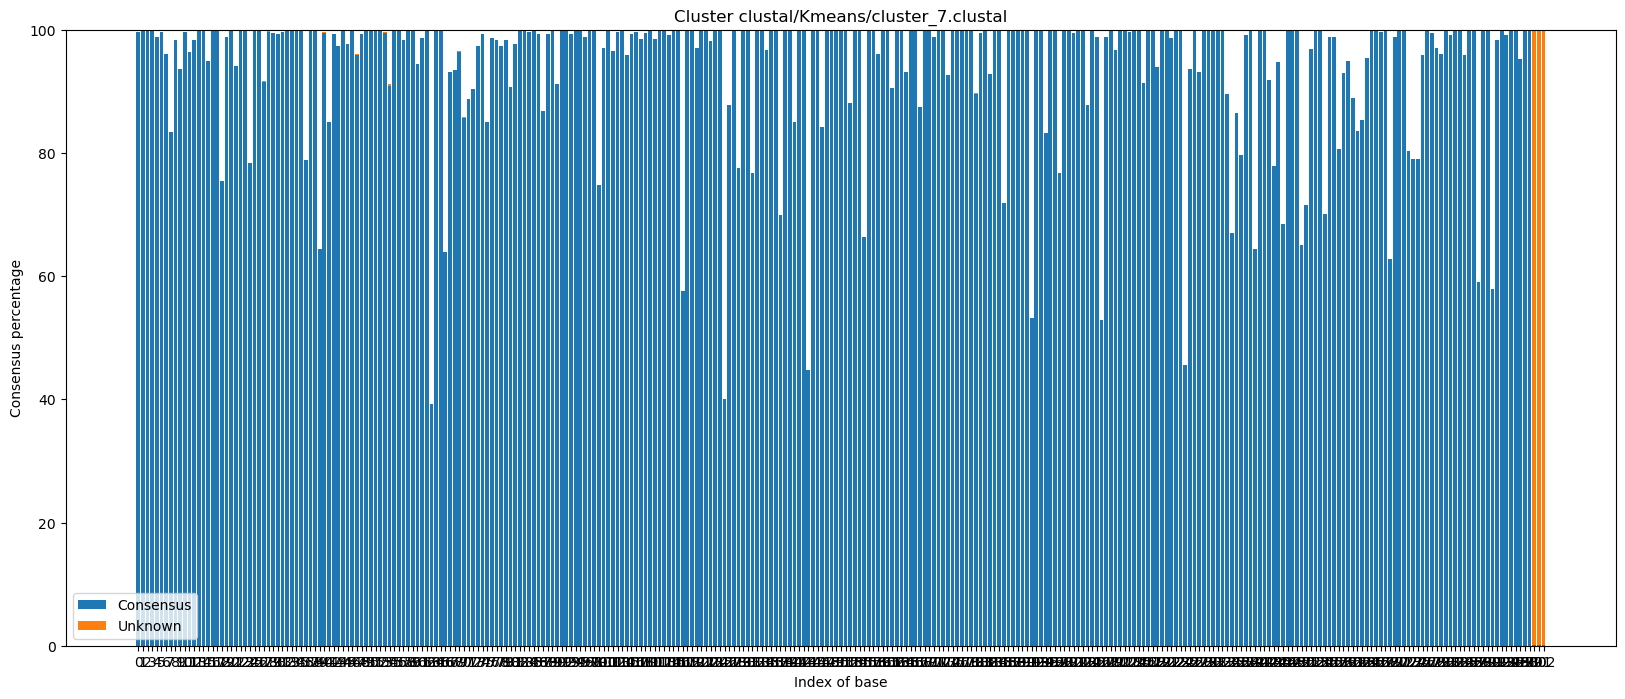

Plot for cluster 8


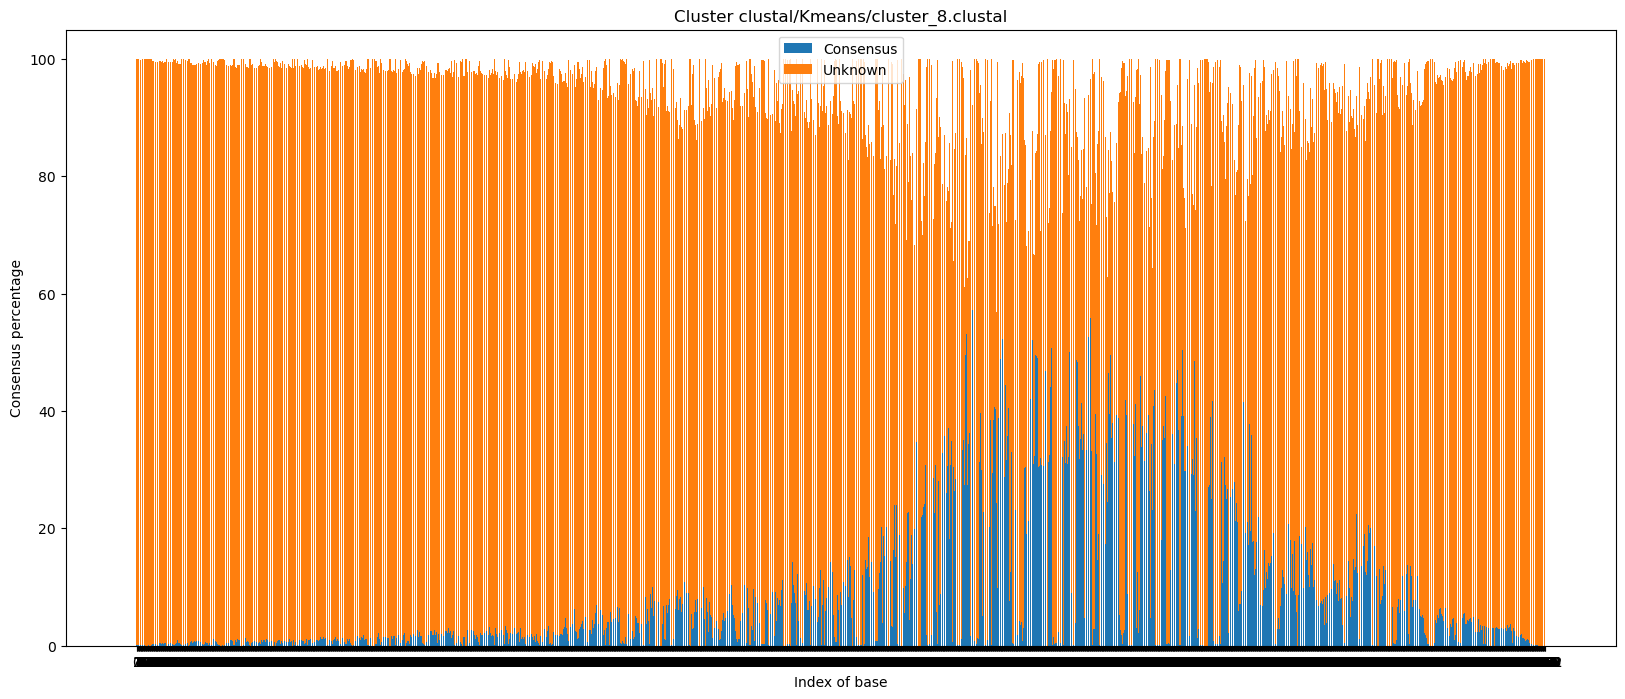

Plot for cluster 9


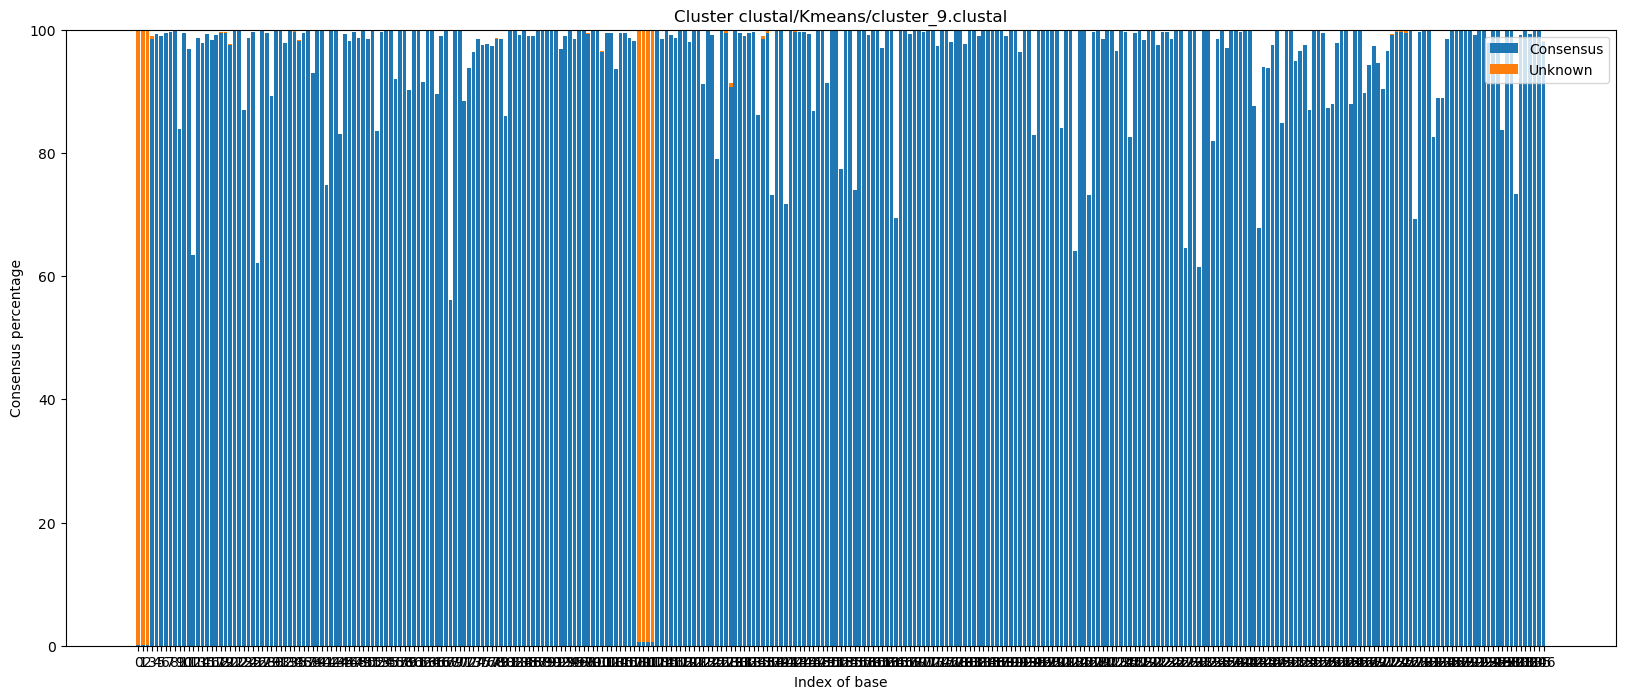

Plot for cluster 10


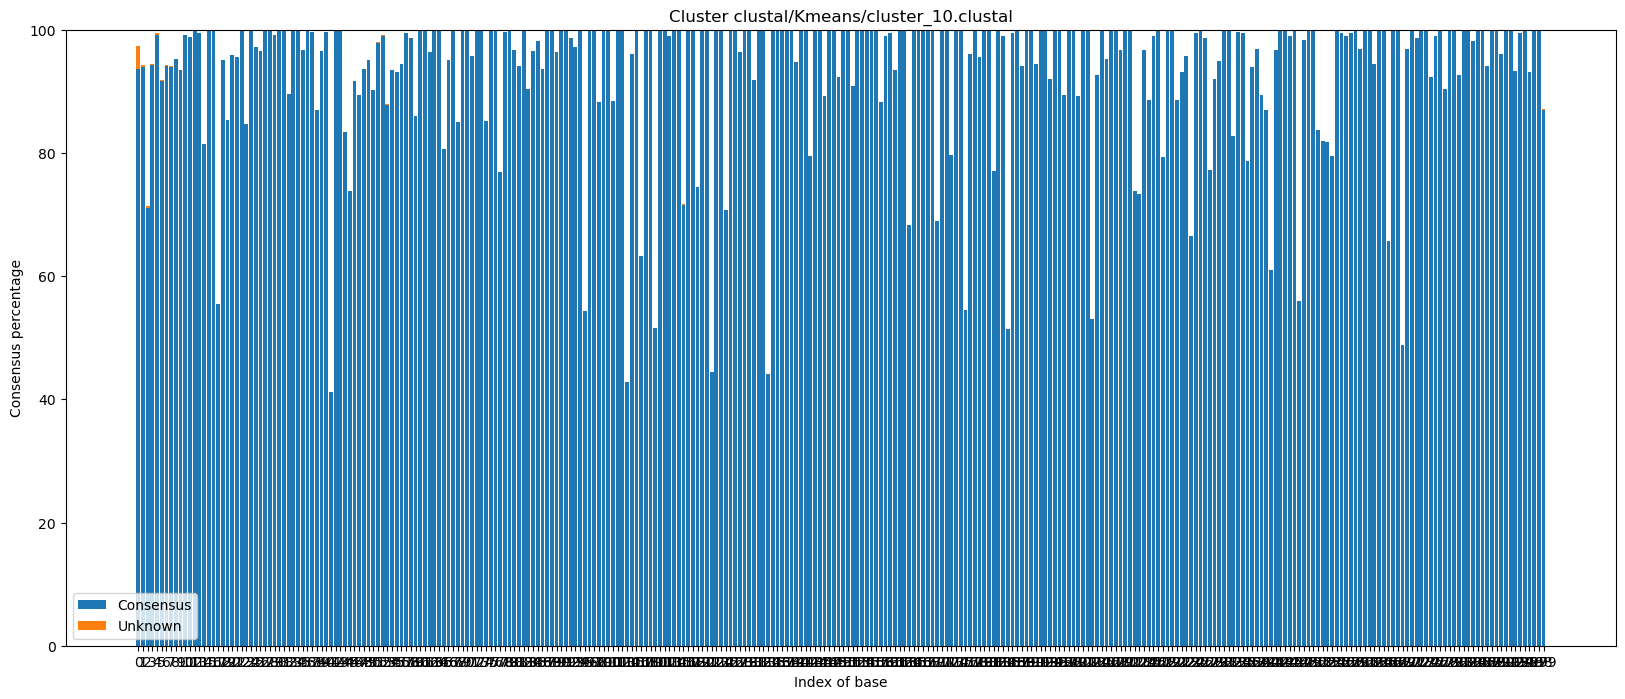

Plot for cluster 11


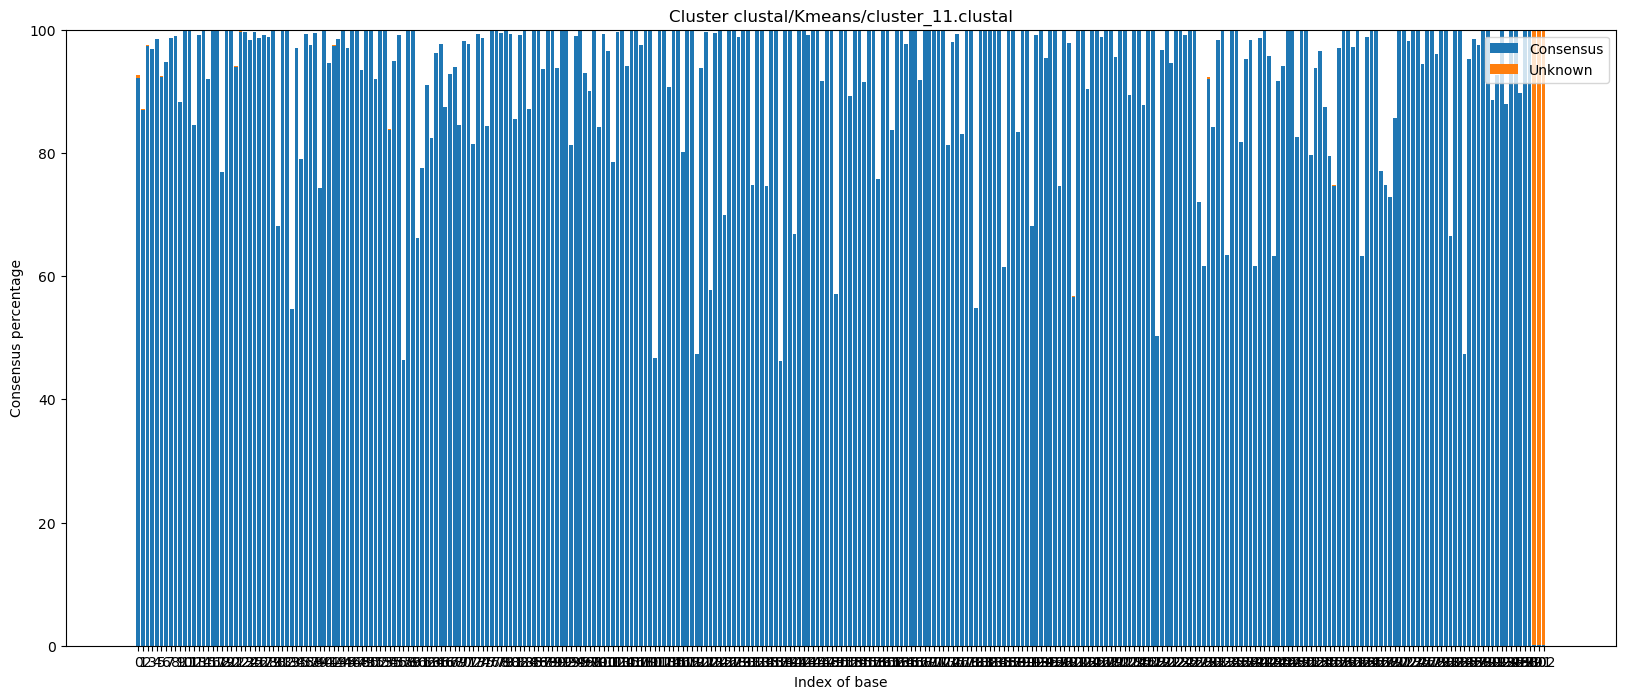

Plot for cluster 12


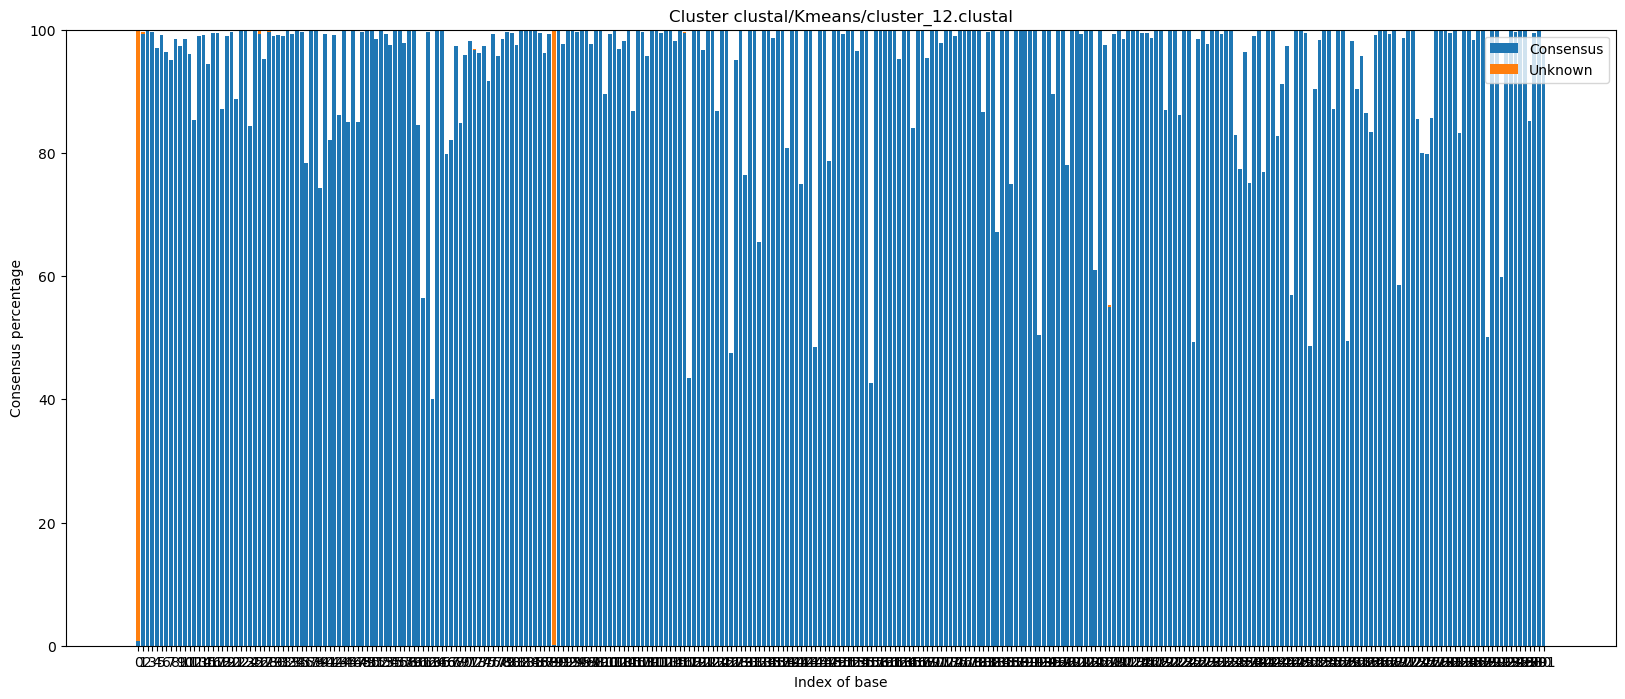

Plot for cluster 13


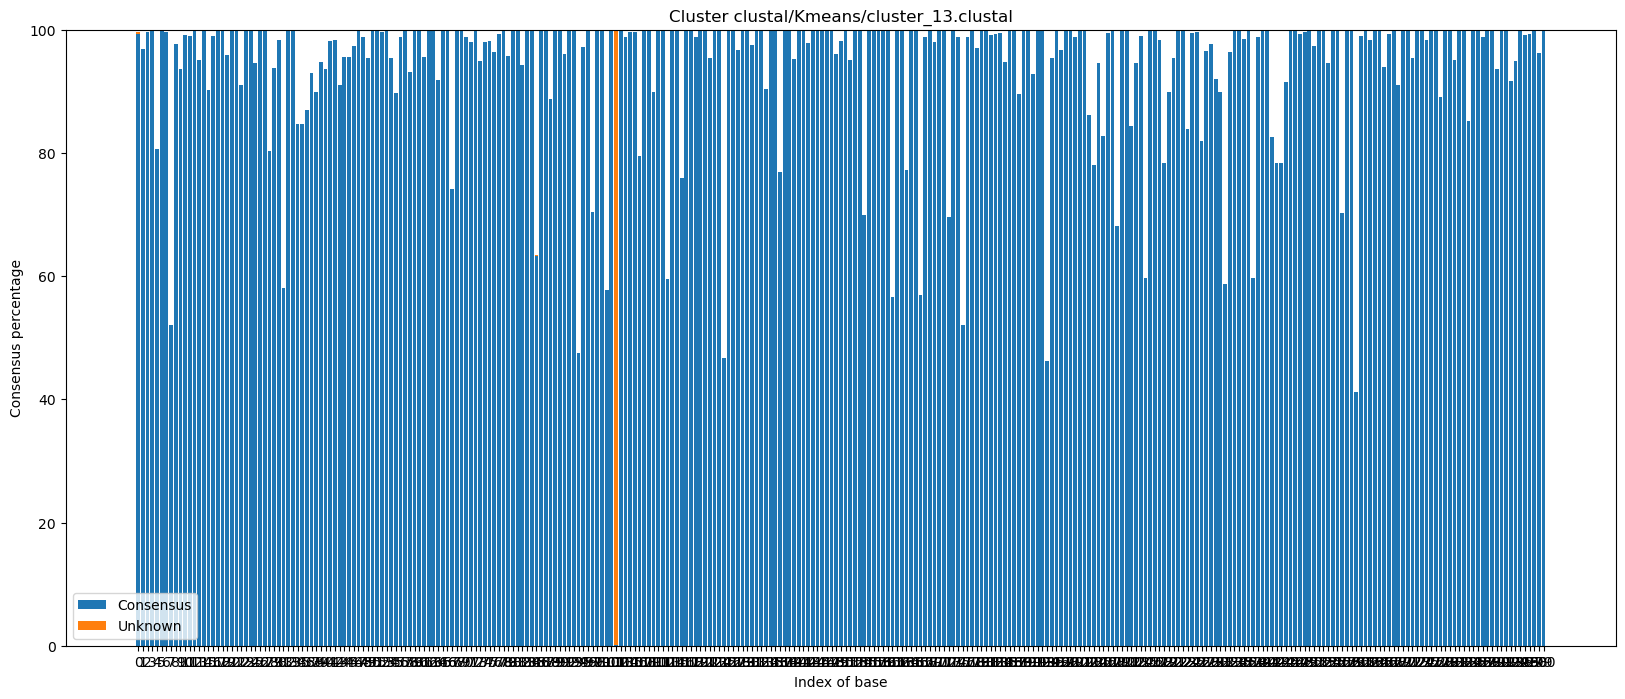

Plot for cluster 14


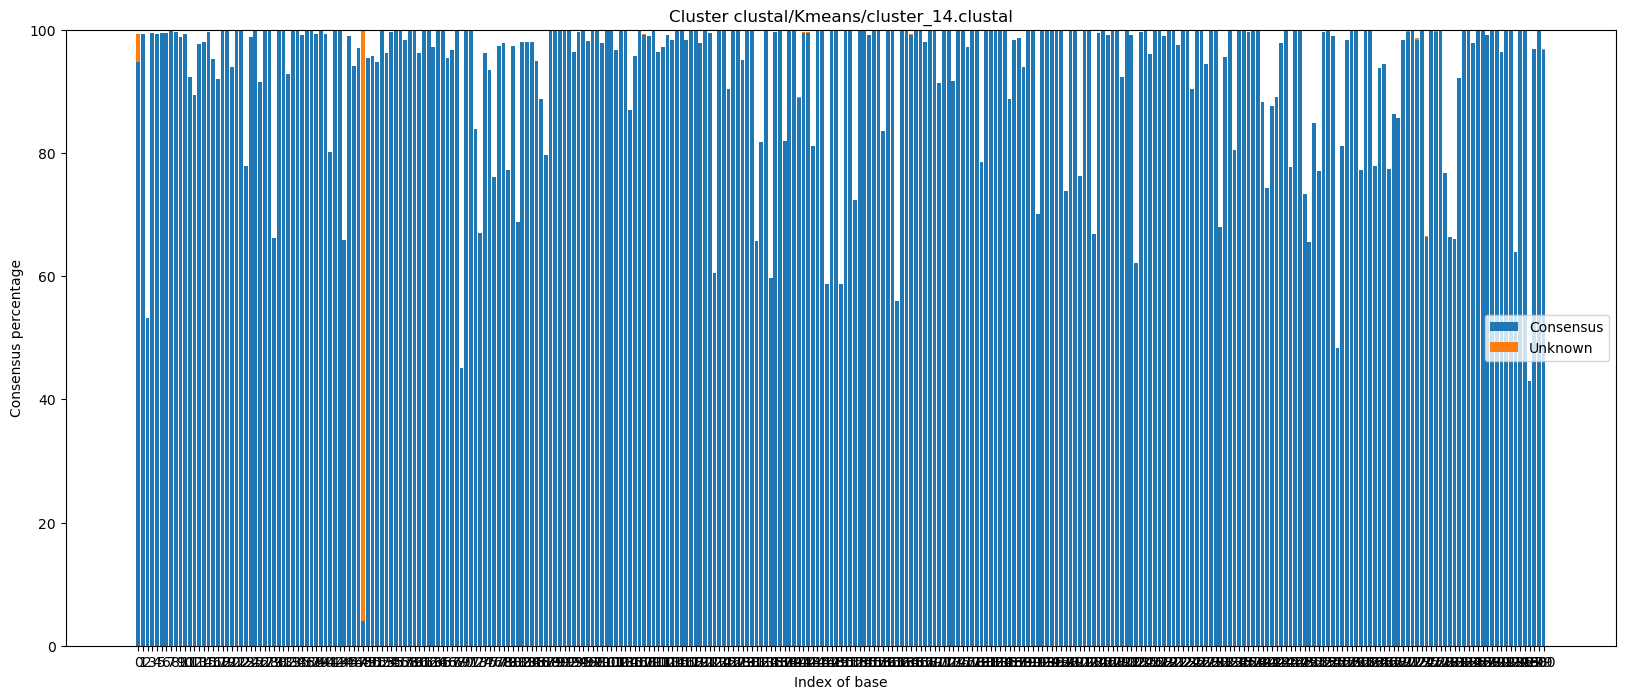

In [15]:
plotClusterRange(architecture_name, 0, num_clusters, unique_labels)

In [9]:
print(np.mean(percentages))
print(np.median(percentages))
print(np.std(percentages))

6.9138759954642754
0.8394160583941607
20.772072121395453


In [10]:
scores, normalized_scores, sum_scores, div_scores = primerExtractionScoreOnModel(architecture_name, cluster_labels, unique_labels, stride=1)

In [11]:
print(scores)
print(normalized_scores)
print(sum_scores)
print(div_scores)

[96.30263157894737, 78.89500509683995, 96.4331797235023, 96.42241379310344, 98.11514392991239, 96.44942528735632, 97.61428571428571, 97.32546842470506, 0, 97.84420289855072, 95.4959349593496, 95.0578813250819, 96.0216606498195, 96.82510288065843, 97.18938053097345]
[0.29276 1.54792 0.83704 2.237   1.56788 3.35644 0.81996 2.80492 0.
 1.0802  0.93968 5.22248 1.06392 1.88228 1.09824]
24.75072
1.6500480000000002


In [12]:
np.count_nonzero(normalized_scores)/len(unique_labels)

0.9333333333333333

In [13]:
sequences_list = list(SeqIO.parse("Data/rbcL.fasta" , "fasta"))
family_count_per_cluster, family_frequencies_per_cluster = getFamiliesPerCluster(cluster_labels, unique_labels, getIDs("Data/rbcL_ids.txt"), getIDFamilyMapping(sequences_list))

In [14]:
print(family_count_per_cluster)
print(family_frequencies_per_cluster)

{0: 109, 1: 460, 2: 214, 3: 520, 4: 342, 5: 704, 6: 246, 7: 741, 8: 9478, 9: 122, 10: 331, 11: 1006, 12: 335, 13: 513, 14: 300}
{0: {'triphylla': 1, 'smallii': 1, 'braceana': 1, 'mungos': 2, 'ovalifolia': 1, 'lycopersicum': 1, 'aurantiocaulis': 2, 'tataricum': 19, 'controversa': 1, 'miyagii': 1, 'clarkei': 1, 'linearis': 1, 'wrightii': 1, 'pleiantha': 3, 'gracilis': 1, 'sp.': 1, 'chrysocephalum': 1, 'acuta': 1, 'crenata': 1, 'palmatum': 1, 'emarginata': 1, 'japonica': 4, 'wadanum': 1, 'versipellis': 2, 'triflora': 1, 'nigrum': 1, 'chinensis': 2, 'pycnophylloides': 1, 'corchorifolius': 1, 'flexuosa': 2, 'neocaledonicum': 1, 'delavayi': 1, 'villosa': 1, 'lanceolata': 1, 'salicina': 1, 'septemlobus': 1, 'paniculata': 1, 'bravensis': 1, 'integra': 3, 'environmental': 1, 'yabunikkei': 1, 'cf.': 2, 'trilobus': 1, 'canadensis': 2, 'lucieae': 1, 'hereroense': 1, 'sieboldianus': 1, 'prunifolia': 1, 'croceacanthus': 1, 'arguta': 1, 'glanduliferum': 1, 'regalis': 1, 'beccarii': 1, 'innovans': 1, 